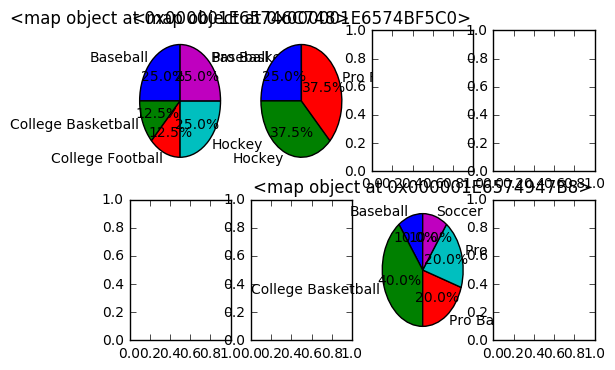

In [25]:
import os
import requests
import csv
import json
import datetime
import collections
import pandas as pd
import matplotlib.pyplot as plt



article_search_key = "5a8504671cd24953bebb1b6abd017763"
r = requests.get('https://api.github.com/events')
def draw_pie(begin_date, end_date):
    my_params= {'api-key': article_search_key,'fq': "section_name:(\"Sports\")", 'begin_date': begin_date,'end_date': end_date,'sort': "newest",'page': 100}
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    temp = requests.get(url,params=my_params)
    if "response" in temp.json():
        resp  =temp.json()['response']

        df = pd.DataFrame(resp['docs'])

        df['year']=map(lambda x:x[:4],df['pub_date'].values)
        df[['pub_date','year','subsection_name']].to_csv("{0}.csv".format(begin_date[:4]))
        groupby_subsection = df.groupby(['year','subsection_name']).count()['_id']
        index = [j for i,j in groupby_subsection.index.tolist()]
        plt.title(df['year'].ix[0])

        # Create a pie chart
        plt.pie(
            # using count of subsections
            groupby_subsection,
            # with the labels being names
            labels=index,
            # with no shadows
            shadow=False,
            # with the start angle at 90%
            startangle=90,
            # with the percent listed as a fraction
            autopct='%1.1f%%',
        )

fig = plt.figure()
count=241
for i in range(0,8):
    fig.add_subplot(count)
    count=count+1   #top left
    begin = '201{0}0101'.format(i)
    end = '201{0}1230'.format(i)
    draw_pie(begin,end)
    

plt.show()


